# Flight Price Prediction

## Problem Statement
As several air ticket booking corporations are popping up online, passengers are trying to learn how ticket pricing decisions are taken by these airline corporations and how it varies so often. Nowadays, airline companies use complicated techniques and approaches to systematically allocate airfare prices. Due to the high complexity of the pricing models applied by the airlines, it is very difficult for a customer to purchase an air ticket at the lowest price, since the price changes dynamically and it is really difficult for a person to predict it. As data scientists, the task given here is to accurately predict the flight price. The prediction will help the passengers to decide a specific airline as per his/her budget and save his/her time and money.

## Data Description

flight_name: The name of the airline.

departure_time: The time when the journey starts from the source.

departure_city: The source of travel.

flight_duration: Total duration of the flight.

arrival_time: Time of arrival at the destination.

arrival_city: The destination of travel.

Route: The route taken by the flight to reach the destination.

flight_cost: The price of the ticket. (Target Variable)

total_stops: Total stops between the source and destination.

Date_of_Journey: The date of the journey.

Day_of_Booking : Date when the data was fetched (we will assume it to be the date of booking)

## Import the required libraries

In [1]:
import pandas as pd
import sweetviz
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pickle

## Read the Data

In [38]:
df = pd.read_csv("C:/Users/saipr/Downloads/Capstone Projects/final_data.csv")
df.head(5)

,flight_name,departure_time,departure_city,flight_duration,arrival_time,arrival_city,flight_cost,total_stops,Date_of_Journey,Day_of_Booking
0,IndiGo,07:30,Bengaluru,07 hrs 40 mins,15:10,Mumbai,"₹ 5,592",1 stop via Kochi,20/07/2020,19/07/2020
1,IndiGo,07:55,Bengaluru,01 hr 45 mins,09:40,Mumbai,"₹ 5,592",Non stop,20/07/2020,19/07/2020
2,IndiGo,10:50,Bengaluru,07 hrs 35 mins,18:25,Mumbai,"₹ 5,592",1 stop via Hyderabad,20/07/2020,19/07/2020
3,IndiGo,12:45,Bengaluru,05 hrs 40 mins,18:25,Mumbai,"₹ 5,599",1 stop via Hyderabad,20/07/2020,19/07/2020
4,IndiGo,12:10,Bengaluru,04 hrs 30 mins,16:40,Mumbai,"₹ 5,599",1 stop via Goa,20/07/2020,19/07/2020


In [39]:
for i in df.columns:
    print("Unique values in", i, df[i].nunique())

Unique values in flight_name 20
Unique values in departure_time 254
Unique values in departure_city 5
Unique values in flight_duration 278
Unique values in arrival_time 5882
Unique values in arrival_city 5
Unique values in flight_cost 1042
Unique values in total_stops 157
Unique values in Date_of_Journey 128
Unique values in Day_of_Booking 5


In [40]:
#df[df['flight_name'] =='AirAsia, Vistara']

In [41]:
df.info() #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60936 entries, 0 to 60935
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   flight_name      60936 non-null  object
 1   departure_time   60936 non-null  object
 2   departure_city   60936 non-null  object
 3   flight_duration  60936 non-null  object
 4   arrival_time     60936 non-null  object
 5   arrival_city     60936 non-null  object
 6   flight_cost      60936 non-null  object
 7   total_stops      60936 non-null  object
 8   Date_of_Journey  60936 non-null  object
 9   Day_of_Booking   60936 non-null  object
dtypes: object(10)
memory usage: 4.6+ MB


## Sweetviz
Sweetviz is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with a single line of code. Output is a fully self-contained HTML application.The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

In [42]:
my_report = sweetviz.analyze([df, "Data"])
my_report.show_html('Report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!
Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Flight_cost

Remove the rupee sign

In [43]:
df['flight_cost']=df['flight_cost'].str.split(' ').str[1]

In [44]:
string = "₹ 5,592"
string.split(" ")

['₹', '5,592']

Remove the comma

In [45]:
df['flight_cost']=df['flight_cost'].str.replace(",", "").astype(int)

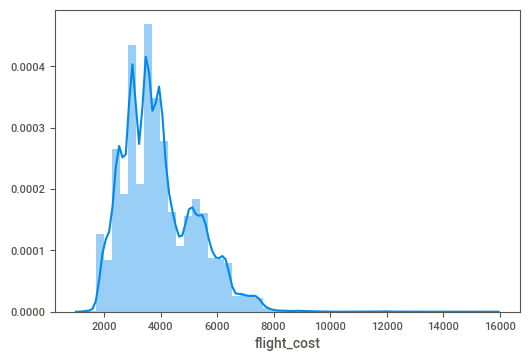

In [46]:
sns.distplot(df['flight_cost']);

In [47]:
df.head()

,flight_name,departure_time,departure_city,flight_duration,arrival_time,arrival_city,flight_cost,total_stops,Date_of_Journey,Day_of_Booking
0,IndiGo,07:30,Bengaluru,07 hrs 40 mins,15:10,Mumbai,5592,1 stop via Kochi,20/07/2020,19/07/2020
1,IndiGo,07:55,Bengaluru,01 hr 45 mins,09:40,Mumbai,5592,Non stop,20/07/2020,19/07/2020
2,IndiGo,10:50,Bengaluru,07 hrs 35 mins,18:25,Mumbai,5592,1 stop via Hyderabad,20/07/2020,19/07/2020
3,IndiGo,12:45,Bengaluru,05 hrs 40 mins,18:25,Mumbai,5599,1 stop via Hyderabad,20/07/2020,19/07/2020
4,IndiGo,12:10,Bengaluru,04 hrs 30 mins,16:40,Mumbai,5599,1 stop via Goa,20/07/2020,19/07/2020


## flight_duration

Convert the duration into minutes

In [48]:
minute=df['flight_duration'].str.slice(7,).str.extract('(\d+)')
minute = minute.fillna(0)
hour=df['flight_duration'].str.extract('(\d+)').astype('int')
df['duration_mins']= minute.astype('int') + hour*60
df = df.drop('flight_duration',1)
df.head()

,flight_name,departure_time,departure_city,arrival_time,arrival_city,flight_cost,total_stops,Date_of_Journey,Day_of_Booking,duration_mins
0,IndiGo,07:30,Bengaluru,15:10,Mumbai,5592,1 stop via Kochi,20/07/2020,19/07/2020,460
1,IndiGo,07:55,Bengaluru,09:40,Mumbai,5592,Non stop,20/07/2020,19/07/2020,65
2,IndiGo,10:50,Bengaluru,18:25,Mumbai,5592,1 stop via Hyderabad,20/07/2020,19/07/2020,455
3,IndiGo,12:45,Bengaluru,18:25,Mumbai,5599,1 stop via Hyderabad,20/07/2020,19/07/2020,340
4,IndiGo,12:10,Bengaluru,16:40,Mumbai,5599,1 stop via Goa,20/07/2020,19/07/2020,270


## total_stops

Extract the total stops

In [49]:
df['total_stops']=df['total_stops'].str.extract('(\d+)')
df['total_stops']=df['total_stops'].fillna(0).astype(int)
df.head()

,flight_name,departure_time,departure_city,arrival_time,arrival_city,flight_cost,total_stops,Date_of_Journey,Day_of_Booking,duration_mins
0,IndiGo,07:30,Bengaluru,15:10,Mumbai,5592,1,20/07/2020,19/07/2020,460
1,IndiGo,07:55,Bengaluru,09:40,Mumbai,5592,0,20/07/2020,19/07/2020,65
2,IndiGo,10:50,Bengaluru,18:25,Mumbai,5592,1,20/07/2020,19/07/2020,455
3,IndiGo,12:45,Bengaluru,18:25,Mumbai,5599,1,20/07/2020,19/07/2020,340
4,IndiGo,12:10,Bengaluru,16:40,Mumbai,5599,1,20/07/2020,19/07/2020,270


In [50]:
on = df['total_stops'].value_counts().to_frame()
px.pie(on, values='total_stops',names=on.index, hole=.5)

## Timestamp & Date_of_Journey

In [51]:
df['Day_of_Booking'].value_counts()

20/07/2020    30896
19/07/2020    12424
19-07-2020     8771
20-07-2020     4543
21/07/2020     4302
Name: Day_of_Booking, dtype: int64

19-07-2020 & 19/07/2020 is the same thing, so we can replace any one with the other to maintain the format

In [52]:
df['Day_of_Booking']=df['Day_of_Booking'].str.replace("-", "/")
df['Date_of_Journey']=df['Date_of_Journey'].str.replace("-", "/")

In [53]:
df.head()

,flight_name,departure_time,departure_city,arrival_time,arrival_city,flight_cost,total_stops,Date_of_Journey,Day_of_Booking,duration_mins
0,IndiGo,07:30,Bengaluru,15:10,Mumbai,5592,1,20/07/2020,19/07/2020,460
1,IndiGo,07:55,Bengaluru,09:40,Mumbai,5592,0,20/07/2020,19/07/2020,65
2,IndiGo,10:50,Bengaluru,18:25,Mumbai,5592,1,20/07/2020,19/07/2020,455
3,IndiGo,12:45,Bengaluru,18:25,Mumbai,5599,1,20/07/2020,19/07/2020,340
4,IndiGo,12:10,Bengaluru,16:40,Mumbai,5599,1,20/07/2020,19/07/2020,270


## Save the data for Data Analytics

In [54]:
#df.to_csv("C:/Users/saipr/Downloads/analytics_data.csv", index=False) #Analytics

Convert to pd.to_datetime

In [55]:
df["Date_of_Journey"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y")
df["Day_of_Booking"] = pd.to_datetime(df['Day_of_Booking'], format="%d/%m/%Y")

One of the very important factors which influences Flight Ticket price is how soon you book the ticket. Since this information was not provided in the dataset, we can subtract the 'Date_of_Journey' and 'Timestamp' to get a new column named 'Days_to_Departure'

In [56]:
df['Days_to_Departure']=(df['Date_of_Journey'] - df['Day_of_Booking']).dt.days

In [57]:
df.tail()

,flight_name,departure_time,departure_city,arrival_time,arrival_city,flight_cost,total_stops,Date_of_Journey,Day_of_Booking,duration_mins,Days_to_Departure
60931,IndiGo,13:50,Jaipur,19:50,Hyderabad,5452,1,2020-09-21,2020-07-20,360,63
60932,IndiGo,13:50,Jaipur,21:30,Hyderabad,4831,1,2020-09-21,2020-07-20,460,63
60933,Spicejet,05:45,Jaipur,17:10,Hyderabad,4831,1,2020-09-21,2020-07-20,685,63
60934,IndiGo,07:50,Jaipur,15:10,Hyderabad,5452,2,2020-09-21,2020-07-20,440,63
60935,IndiGo,10:30,Jaipur,17:30,Hyderabad,4831,1,2020-09-21,2020-07-20,420,63


## Weekday/Weekend

One more important factor could be whether the day is a weekday or a weekend.

In [58]:
df['Weekend'] = np.where((df['Date_of_Journey'].dt.dayofweek) < 5,0,1)
df.head()

,flight_name,departure_time,departure_city,arrival_time,arrival_city,flight_cost,total_stops,Date_of_Journey,Day_of_Booking,duration_mins,Days_to_Departure,Weekend
0,IndiGo,07:30,Bengaluru,15:10,Mumbai,5592,1,2020-07-20,2020-07-19,460,1,0
1,IndiGo,07:55,Bengaluru,09:40,Mumbai,5592,0,2020-07-20,2020-07-19,65,1,0
2,IndiGo,10:50,Bengaluru,18:25,Mumbai,5592,1,2020-07-20,2020-07-19,455,1,0
3,IndiGo,12:45,Bengaluru,18:25,Mumbai,5599,1,2020-07-20,2020-07-19,340,1,0
4,IndiGo,12:10,Bengaluru,16:40,Mumbai,5599,1,2020-07-20,2020-07-19,270,1,0


In [59]:
df = df.drop(['Date_of_Journey','Day_of_Booking'],1)

## departure_time & arrival_time

Another important parameter which influences Flight Price is Departure time & Arrival Time of the flight i.e. Before 6AM, 6AM-12PM, 12PM-6PM or After 6PM.

In [60]:
def get_cat(dep):
    dep = dep.split(':')
    dep = int(dep[0])
    if (dep >= 0 and dep < 6):
        return 'Before 6AM'
    elif (dep >= 6 and dep < 12): 
        return '6AM-12PM'
    elif (dep >= 12 and dep < 18): 
        return '12PM-6PM'
    else: 
        return 'After 6PM'

In [61]:
df['dep_session']=df['departure_time'].apply(get_cat) 
df['arr_session']=df['arrival_time'].apply(get_cat) 
df = df.drop(['departure_time','arrival_time'],1)
df.head()

,flight_name,departure_city,arrival_city,flight_cost,total_stops,duration_mins,Days_to_Departure,Weekend,dep_session,arr_session
0,IndiGo,Bengaluru,Mumbai,5592,1,460,1,0,6AM-12PM,12PM-6PM
1,IndiGo,Bengaluru,Mumbai,5592,0,65,1,0,6AM-12PM,6AM-12PM
2,IndiGo,Bengaluru,Mumbai,5592,1,455,1,0,6AM-12PM,After 6PM
3,IndiGo,Bengaluru,Mumbai,5599,1,340,1,0,12PM-6PM,After 6PM
4,IndiGo,Bengaluru,Mumbai,5599,1,270,1,0,12PM-6PM,12PM-6PM


In [62]:
#px.bar(df, x='dep_session', y='flight_cost', text='flight_cost', color='flight_cost')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60936 entries, 0 to 60935
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   flight_name        60936 non-null  object
 1   departure_city     60936 non-null  object
 2   arrival_city       60936 non-null  object
 3   flight_cost        60936 non-null  int32 
 4   total_stops        60936 non-null  int32 
 5   duration_mins      60936 non-null  int32 
 6   Days_to_Departure  60936 non-null  int64 
 7   Weekend            60936 non-null  int32 
 8   dep_session        60936 non-null  object
 9   arr_session        60936 non-null  object
dtypes: int32(4), int64(1), object(5)
memory usage: 3.7+ MB


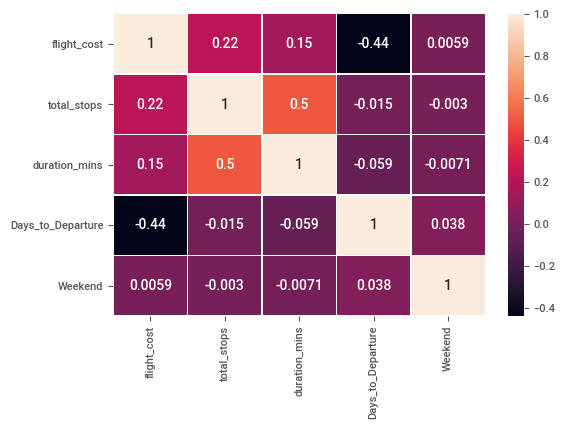

In [64]:
sns.heatmap(df.corr(),linewidths=0.3,annot=True);

## flight_name

In [65]:
df['flight_name'].value_counts()

IndiGo                22442
Vistara               15748
Spicejet              10164
AirAsia                6057
Go Air                 4153
Air India              2048
TruJet                  242
Star Air                 32
AirAsia, Vistara         12
IndiGo, Spicejet         11
Spicejet, TruJet          6
IndiGo, Star Air          5
Air India, Vistara        5
Spicejet, Star Air        3
Air India, IndiGo         2
TruJet, Spicejet          2
Air India, TruJet         1
IndiGo, AirAsia           1
Air India, AirAsia        1
IndiGo, Air India         1
Name: flight_name, dtype: int64

In [66]:
df=df[~df.flight_name.str.contains(",")]

In [67]:
# df = df.assign(flight_name=df['flight_name'].str.split(', ')).explode('flight_name')
# df['flight_name'].value_counts()

In [68]:
ar = df['flight_name'].value_counts().to_frame()
px.bar(ar, x = ar.index, y = 'flight_name', color='flight_name',labels={'flight_name':'count','x':'flight_name'})

In [69]:
df.head()

,flight_name,departure_city,arrival_city,flight_cost,total_stops,duration_mins,Days_to_Departure,Weekend,dep_session,arr_session
0,IndiGo,Bengaluru,Mumbai,5592,1,460,1,0,6AM-12PM,12PM-6PM
1,IndiGo,Bengaluru,Mumbai,5592,0,65,1,0,6AM-12PM,6AM-12PM
2,IndiGo,Bengaluru,Mumbai,5592,1,455,1,0,6AM-12PM,After 6PM
3,IndiGo,Bengaluru,Mumbai,5599,1,340,1,0,12PM-6PM,After 6PM
4,IndiGo,Bengaluru,Mumbai,5599,1,270,1,0,12PM-6PM,12PM-6PM


In [70]:
on = df['arrival_city'].value_counts().to_frame()
px.pie(on, values='arrival_city',names=on.index)

In [71]:
on = df['departure_city'].value_counts().to_frame()
px.pie(on, values='departure_city',names=on.index)

## One Hot Encoding

We save the encodes for deployment

In [72]:
enc=pd.get_dummies(df[['flight_name', 'departure_city','arrival_city','dep_session', 'arr_session']]).iloc[[0]]
enc.to_csv("C:/Users/saipr/Downloads/Capstone Projects/final_enc.csv", index=False) #Web App File

In [37]:
#enc.to_csv("C:/Users/saipr/Downloads/Capstone Projects/final_enc.csv", index=False)

NameError: name 'enc' is not defined

One hot encoding on the dataset

In [73]:
df = pd.get_dummies(df, columns=['flight_name', 'departure_city','arrival_city','dep_session', 'arr_session'])

In [74]:
df.head()

,flight_cost,total_stops,duration_mins,Days_to_Departure,Weekend,flight_name_Air India,flight_name_AirAsia,flight_name_Go Air,flight_name_IndiGo,flight_name_Spicejet,...,arrival_city_Mumbai,arrival_city_New Delhi,dep_session_12PM-6PM,dep_session_6AM-12PM,dep_session_After 6PM,dep_session_Before 6AM,arr_session_12PM-6PM,arr_session_6AM-12PM,arr_session_After 6PM,arr_session_Before 6AM
0,5592,1,460,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
1,5592,0,65,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,5592,1,455,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,5599,1,340,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
4,5599,1,270,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0


In [75]:
# df['total_stops'] = pd.Categorical(df.total_stops)
# df['Days_to_Departure'] = pd.Categorical(df.Days_to_Departure)
# df['Weekend'] = pd.Categorical(df.Weekend)

## Separating the predictor variables(X) and target variable(y)

In [76]:
X = df.drop('flight_cost', axis=1)
y = df['flight_cost'].values

## Train Test Split

In [77]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

## Baseline Model

In [78]:
y = np.log(y)
X['duration_mins'] = np.log(X['duration_mins'])

In [79]:
np.mean(y_train)

3936.3774944567626

In [80]:
np.mean(y_test)

3935.9422729512235

## Linear Regression

In [81]:
lr = LR().fit(X_train,y_train)
pred = lr.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, pred))
SSE = np.sum((pred-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test = 1 - SSE/SST
print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  976.6006998413604
Test SSE :  11614754432.161272
Test SST :  19505107865.14735
Test R2 :  0.40452754670918456


## Linear Regression on training set

In [82]:
lr = LR().fit(X_train,y_train)
pred = lr.predict(X_train)
r2_score(y_train,pred)

0.40706887517325174

## XGB Regressor

In [83]:
xgb=XGBRegressor().fit(X_train,y_train)
pred = xgb.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, pred))
SSE = np.sum((pred-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test = 1 - SSE/SST
print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  704.2627193585774
Test SSE :  6040117238.602406
Test SST :  19505107865.14735
Test R2 :  0.6903315131419923


## XGB Regressor on Train set

In [84]:
xgb=XGBRegressor().fit(X_train,y_train)
pred = xgb.predict(X_train)
r2_score(y_train,pred)

0.7434036437335204

## Random Forest Regressor

In [85]:
rf = RandomForestRegressor().fit(X_train,y_train)
pred = rf.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, pred))
SSE = np.sum((pred-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test = 1 - SSE/SST
print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  733.5035353117432
Test SSE :  6552098119.441948
Test SST :  19505107865.14735
Test R2 :  0.6640829589489455


## Visualize the Important features

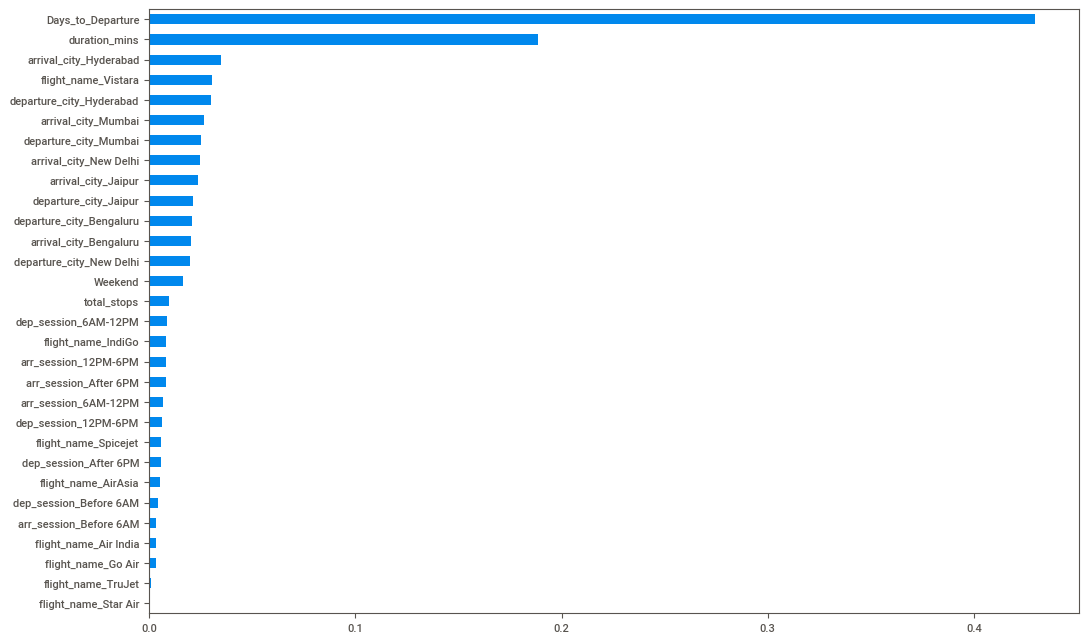

In [86]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
feat_importances.plot(kind='barh')

## RFE

In [87]:
rfe = RFE(lr)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [88]:
rf_feat = feat_importances.sort_values(ascending=False)

In [89]:
rfe_feat = pd.Series(rfe.ranking_, index=X.columns).sort_values()

In [90]:
pd.concat([rf_feat, rfe_feat], axis=1) 

,0,1
Days_to_Departure,0.429505,15
duration_mins,0.188673,16
arrival_city_Hyderabad,0.034858,3
flight_name_Vistara,0.030329,10
departure_city_Hyderabad,0.029859,1
arrival_city_Mumbai,0.026455,4
departure_city_Mumbai,0.025194,1
arrival_city_New Delhi,0.024836,1
arrival_city_Jaipur,0.023850,1
departure_city_Jaipur,0.021410,1


## GridSearchCV on XGB Regressor

In [55]:
#xgb1 = XGBRegressor()
#parameters = {'objective':['reg:linear'],
#              'learning_rate': [ 0.200000012, 0.300000012, 0.400000012], 
#              'max_depth': [5, 6, 7, 8],
#              'min_child_weight': [1, 2, 3]}

#Runtime for this is approximately an hour

In [56]:
#xgb_grid = GridSearchCV(xgb1,parameters, cv = 5, verbose=True)
#xgb_grid.fit(X_train, y_train)

In [57]:
#xgb_grid.best_params_

In [58]:
#pred = xgb_grid.predict(X_test)
#rmse_test = np.sqrt(mean_squared_error(y_test, pred))
#SSE = np.sum((pred-y_test)**2)
#SST = np.sum((y_test-np.mean(y_train))**2)
#r2_test = 1 - SSE/SST
#print("Test RMSE : ", rmse_test)
#print("Test SSE : ", SSE)
#print("Test SST : ", SST)
#print("Test R2 : ", r2_test)

In [59]:
#pred = xgb_grid.predict(X_train)
#r2_score(y_train,pred)

## Training on the whole dataset and saving the model for deployment

In [91]:
xgb=XGBRegressor(learning_rate=0.200000012,max_depth=8,min_child_weight=2,objective= 'reg:linear').fit(X,y)
pred = xgb.predict(X)
r2_score(y,pred)

[20:57:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


0.8072635347126047

In [92]:
pickle.dump(xgb,open(r"C:/Users/saipr/Downloads/Capstone Projects/flight_final.pkl",'wb'))

In [63]:
import streamlit
streamlit run C:/Users/Nachiketa/Desktop/Dimensionless/ML Labs/Flight_deployed_new.py

SyntaxError: invalid syntax (<ipython-input-63-a77a7011f27f>, line 2)